          id                                          statement      status
22261  22261  Just as the the title says. I feel like one is...  Depression
41400  41400  a blackened sky encroached tugging behind it m...  Depression
20065  20065  It gives you insomnia, which in turn makes you...  Depression
30036  30036  Hello all, I'm a new submitter to this channel...      Normal
780      780                   Thank God the CB is over for Eid      Normal
Index(['id', 'statement', 'status'], dtype='object')


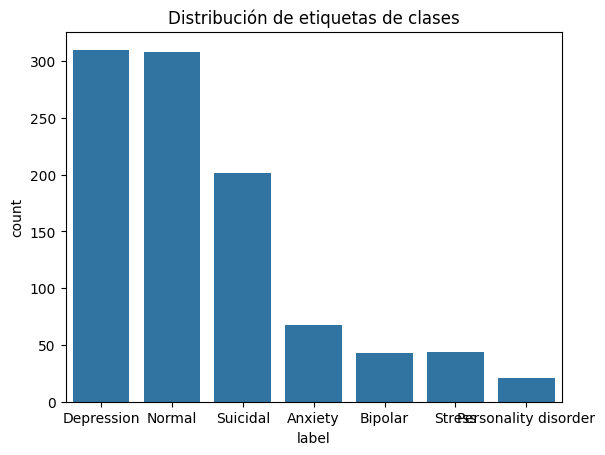

Top 10 características por Ganancia de Información Mutua:
not    0.26
am     0.24
and    0.20
do     0.19
my     0.17
that   0.15
me     0.14
just   0.14
but    0.13
of     0.13
dtype: float64


 97%|█████████▋| 30/31 [01:14<00:00,  1.74it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11606
[LightGBM] [Info] Number of data points in the train set: 796, number of used features: 397
[LightGBM] [Info] Start training from score -2.654247
[LightGBM] [Info] Start training from score -3.096080
[LightGBM] [Info] Start training from score -1.158138
[LightGBM] [Info] Start training from score -1.198960
[LightGBM] [Info] Start training from score -3.789227
[LightGBM] [Info] Start training from score -3.213863
[LightGBM] [Info] Start training from score -1.579733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

100%|██████████| 31/31 [01:16<00:00,  2.46s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SGDClassifier                      0.56               0.47    None      0.57   
PassiveAggressiveClassifier        0.55               0.46    None      0.55   
LinearSVC                          0.53               0.45    None      0.54   
Perceptron                         0.50               0.44    None      0.50   
RidgeClassifier                    0.62               0.42    None      0.59   
RidgeClassifierCV                  0.62               0.42    None      0.58   
LogisticRegression                 0.61               0.41    None      0.59   
LGBMClassifier                     0.65               0.38    None      0.62   
NearestCentroid                    0.58               0.38    None      0.56   
DecisionTreeClassifier             0.54               0.33    None      0.52   
BernoulliNB                        0.58 

In [2]:
# Feature Pipeline
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# 1. Ruta del archivo de datos
dataset_path = "C:/Users/megag/Documents/Curso IA/Curso Avanzado/Machine Learning Clasification/Sentiment_Analysis_for_Mental_Health.csv"

# 2. Cargar los datos
df = pd.read_csv(dataset_path)

# 3. Limitar los datos a 1,000
df = df.sample(n=1000, random_state=42)

# 4. Mostrar una muestra de los datos
print(df.head())

# 5. Eliminar valores faltantes
df.dropna(inplace=True)

# 6. Revisar las columnas para asegurarnos de que "label" sea el target y "text" sea la característica
print(df.columns)

# 7. Renombrar las columnas si es necesario
df.rename(columns={'status': 'label', 'statement': 'text'}, inplace=True)

# 8. Análisis Exploratorio de Datos (EDA)
sns.countplot(x='label', data=df)
plt.title('Distribución de etiquetas de clases')
plt.show()

# 9. Separar características y target
X = df['text']
y = df['label']

# 10. Vectorización del texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 11. Convertir el TF-IDF a formato denso y calcular Ganancia de Información Mutua
X_dense = X_tfidf.toarray()
mi_scores = mutual_info_classif(X_dense, y.astype('category').cat.codes)
mi_scores = pd.Series(mi_scores, index=vectorizer.get_feature_names_out())
print("Top 10 características por Ganancia de Información Mutua:")
print(mi_scores.sort_values(ascending=False).head(10))

# 12. LazyPredict: Comparación de modelos
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

# 13. Guardar las características y etiquetas
X_path = "C:/Users/megag/Documents/Curso IA/Curso Avanzado/Machine Learning Clasification/X_features.pkl"
y_path = "C:/Users/megag/Documents/Curso IA/Curso Avanzado/Machine Learning Clasification/y_labels.pkl"
vectorizer_path = "C:/Users/megag/Documents/Curso IA/Curso Avanzado/Machine Learning Clasification/tfidf_vectorizer.pkl"

with open(X_path, "wb") as f:
    pickle.dump(X_dense, f)

with open(y_path, "wb") as f:
    pickle.dump(y, f)

with open(vectorizer_path, "wb") as f:
    pickle.dump(vectorizer, f)

print("Características y etiquetas guardadas exitosamente.")
